In this file, will explore different ways of loading MRI data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample_flair_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_flair.nii"
sample_seg_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_seg.nii"
sample_T1_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1.nii"
sample_T1g_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t1ce.nii"
sample_T2_path = "../../lib/BraTS_2018/HGG/Brats18_2013_10_1/Brats18_2013_10_1_t2.nii"

# Reading .nii files using dipy

In [3]:
from dipy.io.image import load_nifti

Load FLAIR

In [4]:
data_flair, affine, im = load_nifti(sample_flair_path, return_img=True)

In [5]:
data_flair.shape

(240, 240, 155)

In [6]:
#FOR NOW, CAST AS ARRAY OF INTS (PROBABLY WANT FLOAT32 EVENTUALLY)
data_flair=data_flair.astype(np.int)

LOAD SEG DATA
This is "y" value, location of different types of tumor

In [7]:
data_seg, affine, im = load_nifti(sample_seg_path, return_img=True)
data_seg=data_seg.astype(np.int)
data_seg.shape

(240, 240, 155)

LOAD T1 DATA

In [8]:
data_T1, affine, im = load_nifti(sample_T1_path, return_img=True)
data_T1=data_T1.astype(np.int)
data_T1.shape

(240, 240, 155)

LOAD T1-GAD DATA

In [9]:
data_T1g, affine, im = load_nifti(sample_T1g_path, return_img=True)
data_T1g=data_T1g.astype(np.int)
data_T1g.shape

(240, 240, 155)

LOAD T2 DATA

In [12]:
data_T2, affine, im = load_nifti(sample_T2_path, return_img=True)
data_T2=data_T2.astype(np.int)
data_T2.shape

(240, 240, 155)

Slice looking down

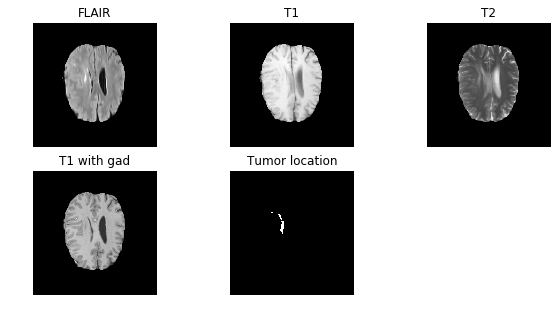

In [31]:
brainslice=100 #z axis how far looking down, can range from 0-155
plt.figure(figsize=(10,5))
plt.title("Top-down view")
#show flair
plt.subplot(2, 3, 1).set_axis_off()
plt.title("FLAIR")
plt.imshow(data_flair[:,:,brainslice].T, cmap='gray', origin='lower')
#show T1
plt.subplot(2,3,2).set_axis_off()
plt.title("T1")
plt.imshow(data_T1[:,:,brainslice].T, cmap='gray', origin='lower')
#show T2
plt.subplot(2,3,3).set_axis_off()
plt.title("T2")
plt.imshow(data_T2[:,:,brainslice].T, cmap='gray', origin='lower')
#show T1 with gad
plt.subplot(2,3,4).set_axis_off()
plt.title("T1 with gad")
plt.imshow(data_T1g[:,:,brainslice].T, cmap='gray', origin='lower')
#show segmented tumore
plt.subplot(2,3,5).set_axis_off()
plt.title("Tumor location")
plt.imshow(data_seg[:,:,brainslice].T, cmap='gray', origin='lower')
plt.show()

Slice from front

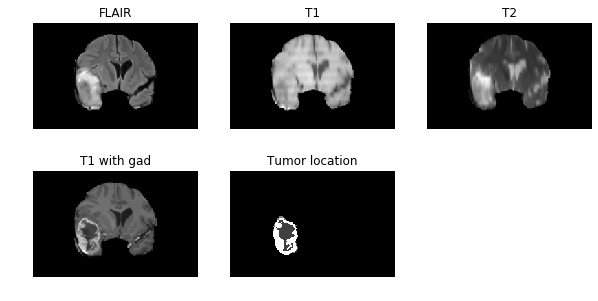

In [30]:
brainslice=100 #z axis how far looking down, can range from 0-155
plt.figure(figsize=(10,5))
plt.title("Top-down view")
#show flair
plt.subplot(2, 3, 1).set_axis_off()
plt.title("FLAIR")
plt.imshow(data_flair[:,brainslice,:].T, cmap='gray', origin='lower')
#show T1
plt.subplot(2,3,2).set_axis_off()
plt.title("T1")
plt.imshow(data_T1[:,brainslice,:].T, cmap='gray', origin='lower')
#show T2
plt.subplot(2,3,3).set_axis_off()
plt.title("T2")
plt.imshow(data_T2[:,brainslice,:].T, cmap='gray', origin='lower')
#show T1 with gad
plt.subplot(2,3,4).set_axis_off()
plt.title("T1 with gad")
plt.imshow(data_T1g[:,brainslice,:].T, cmap='gray', origin='lower')
#show segmented tumore
plt.subplot(2,3,5).set_axis_off()
plt.title("Tumor location")
plt.imshow(data_seg[:,brainslice,:].T, cmap='gray', origin='lower')
plt.show()

Slice from Side

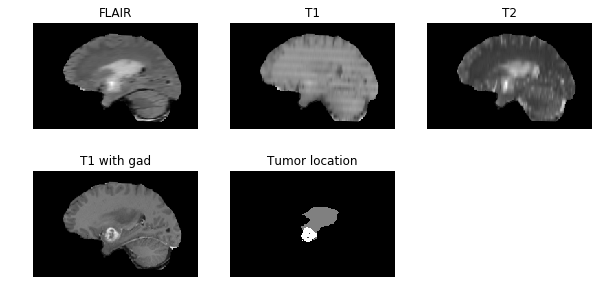

In [28]:
brainslice=100 #z axis how far looking down, can range from 0-155
plt.figure(figsize=(10,5))
plt.title("Top-down view")
#show flair
plt.subplot(2, 3, 1).set_axis_off()
plt.title("FLAIR")
plt.imshow(data_flair[brainslice,:,:].T, cmap='gray', origin='lower')
#show T1
plt.subplot(2,3,2).set_axis_off()
plt.title("T1")
plt.imshow(data_T1[brainslice,:,:].T, cmap='gray', origin='lower')
#show T2
plt.subplot(2,3,3).set_axis_off()
plt.title("T2")
plt.imshow(data_T2[brainslice,:,:].T, cmap='gray', origin='lower')
#show T1 with gad
plt.subplot(2,3,4).set_axis_off()
plt.title("T1 with gad")
plt.imshow(data_T1g[brainslice,:,:].T, cmap='gray', origin='lower')
#show segmented tumore
plt.subplot(2,3,5).set_axis_off()
plt.title("Tumor location")
plt.imshow(data_seg[brainslice,:,:].T, cmap='gray', origin='lower')
plt.show()

## Notes: T1 seems to have "streaky" noise, would need fourier-based noise removal to rectify

# Extracting cooridnates for tumors

In [69]:
np.argwhere(data_seg!=0)

array([[ 57, 123,  52],
       [ 57, 124,  52],
       [ 57, 124,  54],
       ...,
       [111, 122,  71],
       [111, 123,  71],
       [111, 124,  71]])

Extract coordinates of high grade tumors:

In [70]:
np.argwhere(data_seg==4)

array([[ 60, 111,  52],
       [ 60, 111,  54],
       [ 60, 112,  52],
       ...,
       [102, 117,  66],
       [102, 118,  59],
       [102, 118,  60]])